# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [19]:
import palmerpenguins
from palmerpenguins import *
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal

knn = KNeighborsRegressor()
lr = LinearRegression()
dt = DecisionTreeRegressor()
penguin = load_penguins()
penguin = get_dummies(penguin,columns = ["sex","island","species"])
penguin = penguin.dropna()
penguin.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,2007,False,True,False,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,True,True,False,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,True,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,True,True,False,False
5,39.3,20.6,190.0,3650.0,2007,False,True,False,False,True,True,False,False


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [28]:
y = penguin['bill_depth_mm']
X = penguin[['bill_length_mm']]
model_linear = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_linear.fit(X, y)
penguin['linear'] = model_linear.predict(X)

# Quadratic regression
model_quadratic = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_quadratic.fit(X, y)
penguin['quadratic'] = model_quadratic.predict(X)

# Cubic regression
model_cubic = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_cubic.fit(X, y)
penguin['cubic'] = model_cubic.predict(X)

# Degree 10
model_degree10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
model_degree10.fit(X, y)
penguin['degree 10'] = model_degree10.predict(X)

penguin2 = penguin.melt(
    id_vars=['bill_length_mm', 'bill_depth_mm'], 
    value_vars=['linear', 'quadratic', 'cubic', 'degree 10'],
    var_name='Degree', 
    value_name='Prediction'
)
penguin2.head()

,bill_length_mm,bill_depth_mm,Degree,Prediction
0,39.1,18.7,linear,17.561136
1,39.5,17.4,linear,17.527128
2,40.3,18.0,linear,17.459111
3,36.7,19.3,linear,17.765187
4,39.3,20.6,linear,17.544132


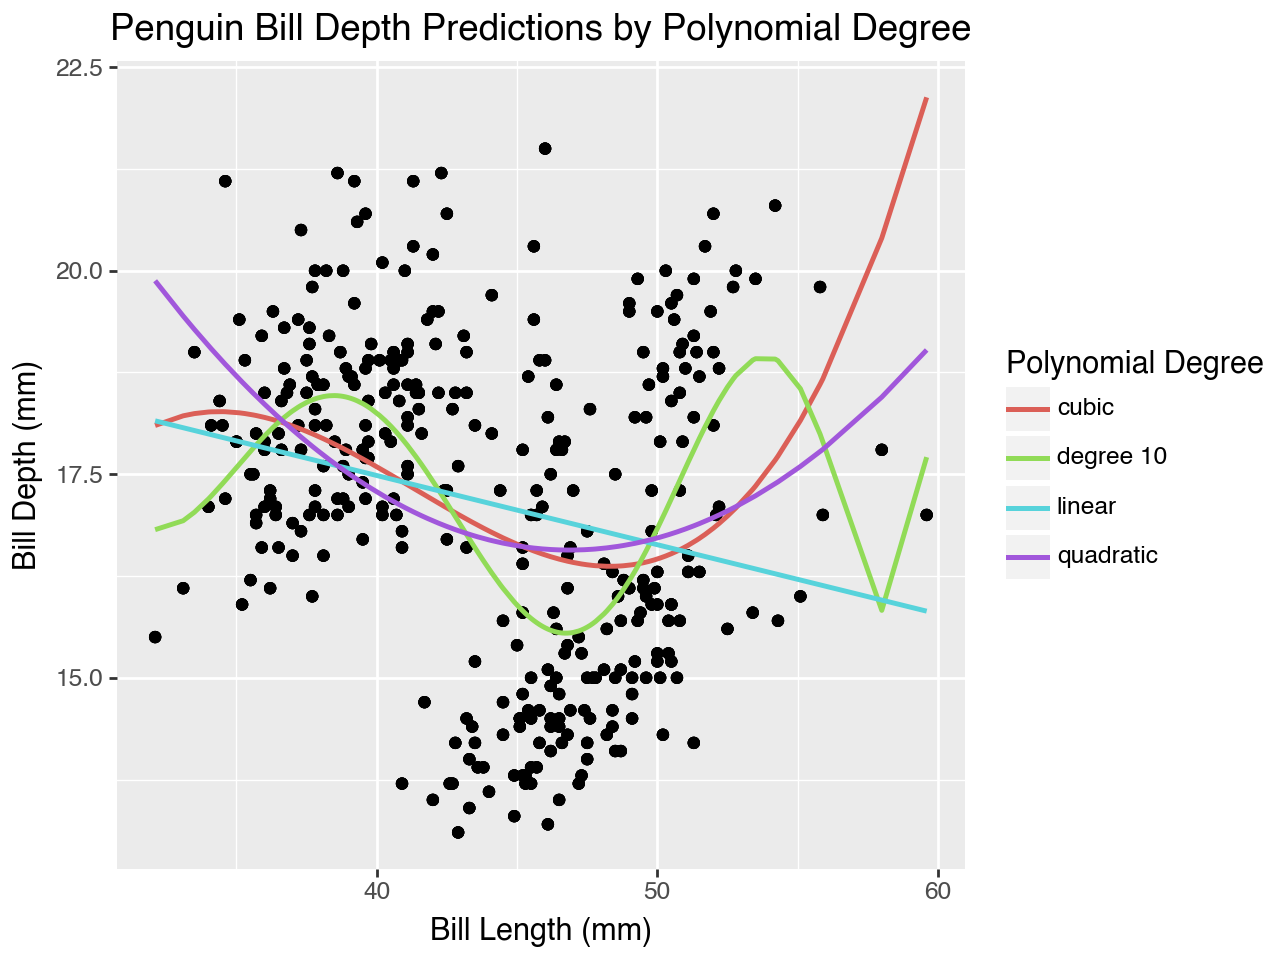

In [33]:
(
    ggplot(penguin_long, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='black') +
    geom_line(aes(y='Prediction', color='Degree'), size=1) +
    labs(
        title='Penguin Bill Depth Predictions by Polynomial Degree',
        x='Bill Length (mm)',
        y='Bill Depth (mm)',
        color='Polynomial Degree'
))


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The fitted values are visibly non linear so I do see the linear model underfitting the data as it does not capture any of the changes in direction the data shows. I would say the degree 10 is most likely an overfitt, it does well at capturing the changes early on but as we can see the green line goes back down at around x=54 when there are only a few data points out there leading to overfitting. I think that the best model for this data is the cubic model as it captures more of the changes than the quadratic model. You could argue that even the quadratic model is underfiting aswell.